In [105]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import cv2


In [56]:
(xtr, ytr), (xte, yte) = mnist.load_data()

In [57]:
xtr.shape

(60000, 28, 28)

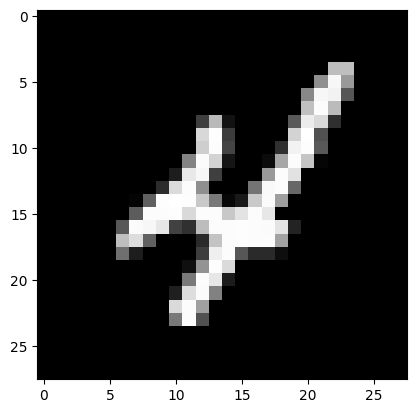

In [58]:
plt.imshow(xtr[9], cmap='gray')
plt.show()

In [59]:
xtr = xtr.reshape(xtr.shape[0], xtr.shape[1] * xtr.shape[2]).astype('float32')/255

In [60]:
xte = xte.reshape(xte.shape[0], -1).astype('float32')/255

In [61]:
enc_ytr = to_categorical(ytr)

In [62]:
enc_yte = to_categorical(yte)

In [63]:
model = Sequential([
    Dense(input_dim = 784, units=1024, activation='tanh'),
    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # softmax or sigmoid
])

/opt/anaconda3/envs/classes/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
history = model.fit(xtr, enc_ytr, validation_data= (xte, enc_yte), epochs=10, batch_size=256)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8708 - loss: 0.4450 - val_accuracy: 0.9687 - val_loss: 0.1061
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9747 - loss: 0.0828 - val_accuracy: 0.9782 - val_loss: 0.0712
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9853 - loss: 0.0480 - val_accuracy: 0.9788 - val_loss: 0.0643
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9914 - loss: 0.0281 - val_accuracy: 0.9786 - val_loss: 0.0708
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9922 - loss: 0.0247 - val_accuracy: 0.9819 - val_loss: 0.0630
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9955 - loss: 0.0147 - val_accuracy: 0.9806 - val_loss: 0.0663
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9832 - val_loss: 0.0646
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9963 - loss: 0.0111 - val_accu

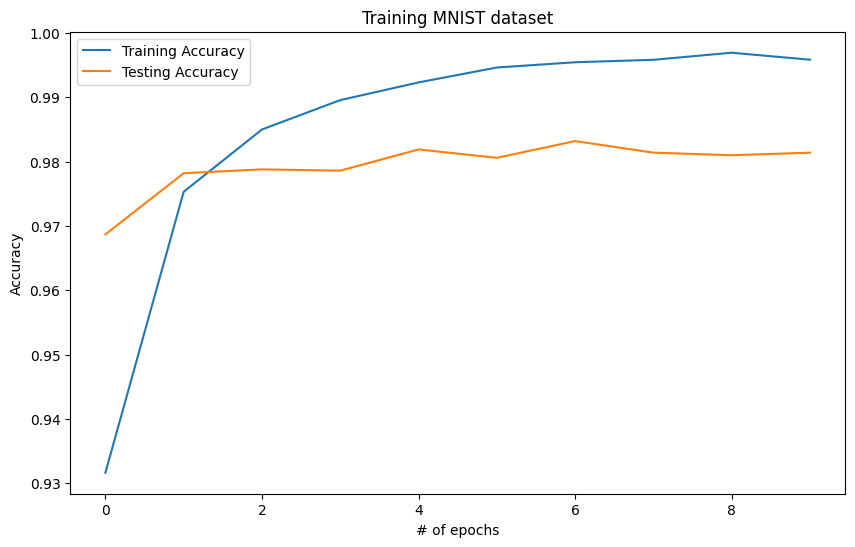

In [103]:
plt.figure(figsize=(10, 6))
plt.title("Training MNIST dataset")
plt.xlabel("# of epochs")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

In [95]:
img_arr = np.array(Image.open(r'test_image.png'))

In [96]:
img_arr_bw = cv2.cvtColor(img_arr, cv2.COLOR_RGB2GRAY)

In [97]:
img_arr_bw = img_arr_bw.reshape(1, img_arr_bw.shape[0]* img_arr_bw.shape[1]).astype('float32')/255

In [98]:
img_arr_bw.shape

(1, 784)

In [99]:
predicted_digit = model.predict(img_arr_bw)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [100]:
predicted_digit

array([[3.2412384e-12, 5.9718900e-06, 3.1042255e-05, 2.9235489e-03,
        6.6505845e-06, 1.0749504e-07, 1.9801536e-09, 1.3956505e-04,
        9.9689305e-01, 2.4262889e-08]], dtype=float32)

In [101]:
pred_digit_index = np.argmax(predicted_digit)

In [102]:
pred_digit_index

8

In [104]:
model.save('mnist_nn.keras')